# Задание 1



```
Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.
Данные нейросети:
− три входа (𝑥1, 𝑥2, 𝑥3
);
− три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);
− выход (𝑜1).
Нейроны имеют идентичные веса и пороги:
− 𝑤 = [0.5, 0.5, 0.5]
− 𝑏 = 0
Данные нейросети:
− два входа (𝑥1, 𝑥2);
− два нейрона в скрытых слоях (ℎ1, ℎ2);
− два выхода (𝑜1, 𝑜2
).
Нейроны имеют идентичные веса и пороги:
− 𝑤 = [1, 0];
− 𝑏 = 1.
```



In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)


class NeuralNetwork1:
    '''
    Данные нейросети:
    − три входа (𝑥1, 𝑥2, 𝑥3);
    − три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);
    − выход (𝑜1).
    Нейроны имеют идентичные веса и пороги:
    − 𝑤 = [0.5, 0.5, 0.5]
    − 𝑏 = 0
    '''
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)

        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

class NeuralNetwork2:
    '''
    Данные нейросети:
    − два входа (𝑥1, 𝑥2);
    − два нейрона в скрытых слоях (ℎ1, ℎ2);
    − два выхода (𝑜1, 𝑜2).
    Нейроны имеют идентичные веса и пороги:
    − 𝑤 = [1, 0];
    − 𝑏 = 1.
    '''
    def __init__(self):
        weights = np.array([1, 0])
        bias = 1
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)

        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h2, out_h1]))

        return out_o1, out_o2

network = NeuralNetwork1()
x = np.array([2, 3, 5])
print(network.feedforward(x))

network = NeuralNetwork2()
x = np.array([2, 5])
print(network.feedforward(x))


0.8160723773367224
(0.8757270529783324, 0.8757270529783324)


# Задание 2

```
Реализуйте классы нейронных сетей с использованием других функций
активации.
```



In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def ReLU(x):
    return np.maximum(0, x)


class Neuron:
    def __init__(self, weights, bias, func):
        self.weights = weights
        self.bias = bias
        self.func = func
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return self.func(total)


class NeuralNetwork3:
    '''
    Данные нейросети:
    − три входа (𝑥1, 𝑥2, 𝑥3);
    − три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);
    − выход (𝑜1).
    Нейроны имеют идентичные веса и пороги:
    − 𝑤 = [0.5, 0.5, 0.5]
    − 𝑏 = 0
    '''
    def __init__(self, func):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron(weights, bias, func)
        self.h2 = Neuron(weights, bias, func)
        self.h3 = Neuron(weights, bias, func)

        self.o1 = Neuron(weights, bias, func)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)

        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1


network = NeuralNetwork3(sigmoid)
x = np.array([2, 3, 5])
print(network.feedforward(x))

network = NeuralNetwork3(tanh)
x = np.array([2, 3, 5])
print(network.feedforward(x))

network = NeuralNetwork3(ReLU)
x = np.array([2, 3, 5])
print(network.feedforward(x))


0.8160723773367224
0.9051236395219001
7.5


# Задание 3



```
Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей.
Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
а для регрессии датасет зависимости заработной платы от опыта работы:
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv
```



----- IRIS MLPClassifier -----


-------DATASET-------


Dataset shape:  (150, 5)
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


-------REGRESSOR-------


Train/Test Sizes : (120, 4) (30, 4) (120,) (30,)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


['Versicolor' 'Virginica' 'Setosa' 'Versicolor' 'Setosa' 'Virginica'
 'Versicolor' 'Setosa']
69     Versicolor
121     Virginica
4          Setosa
51     Versicolor
38         Setosa
147     Virginica
90     Versicolor
15         Setosa
Name: y, dtype: object


-------SCORE-------


Test accuracy : 1.000
Training accuracy : 0.975
Loss : 0.2643881292684216
Number of Coefs : 2
Number of Intercepts : 2
Number of Iterations for Which Estimator Ran : 200
Name of Output Layer Activation Function : softmax


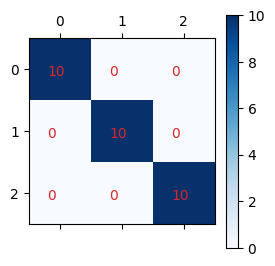

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix


print("----- IRIS MLPClassifier -----")

print("\n\n-------DATASET-------\n\n")

rcst = 727


url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
iris = pd.read_csv(url)

print("Dataset shape: ", iris.shape)
print(iris.describe())


print("\n\n-------REGRESSOR-------\n\n")

dataset = iris.rename(columns = {'sepal.length':'x1', 'sepal.width': 'x2', 'petal.length':'x3', 'petal.width': 'x4', 'variety':'y'}, inplace = False)
X_iris, Y_iris = dataset[['x1', 'x2', 'x3', 'x4']], dataset['y']
X_train, X_test, Y_train, Y_test = train_test_split(X_iris, Y_iris,
                                                    train_size=0.80, test_size=0.20,
                                                    stratify=Y_iris, random_state=rcst)
print("Train/Test Sizes :", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

mlp_classifier = MLPClassifier(random_state=rcst)
mlp_classifier.fit(X_train, Y_train)



Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:8])
print(Y_test[:8])
print("\n\n-------SCORE-------\n\n")

print('Test accuracy : %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training accuracy : %.3f'%mlp_classifier.score(X_train, Y_train))
print("Loss :", mlp_classifier.loss_)
print("Number of Coefs :", len(mlp_classifier.coefs_))
print("Number of Intercepts :", len(mlp_classifier.intercepts_))
print("Number of Iterations for Which Estimator Ran :", mlp_classifier.n_iter_)
print("Name of Output Layer Activation Function :", mlp_classifier.out_activation_)


def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    cx = conf_mat.shape[0]
    cy = conf_mat.shape[1]

    fig = plt.figure(figsize=(cx, cy))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(cx), range(cy))
    plt.xticks(range(cx), range(cy))
    plt.colorbar()
    for i in range(cx):
        for j in range(cy):
            plt.text(i - 0.2, j + 0.1, str(conf_mat[j, i]), color='tab:red')

plot_confusion_matrix(Y_test, Y_preds)

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler


print("----- SALARY MLPRegressor -----")
print("\n\n-------DATASET-------\n\n")

rcst = 727

url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
exp = pd.read_csv(url)

print("Dataset shape: ", exp.describe())

print(exp.head(5))

print("\n\n-------REGRESSOR-------\n\n")

# Нормализуем зарплату
exp[['Salary']] = MinMaxScaler().fit_transform(exp[['Salary']])


Y_exp = exp['Salary']
X_exp = exp[['YearsExperience']]
X_train, X_test, Y_train, Y_test = train_test_split(X_exp, Y_exp, train_size=0.80, test_size=0.20, random_state=rcst)


print("Train/Test Sizes :", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

mlp_regressor = MLPRegressor(random_state=rcst)
mlp_regressor.fit(X_train, Y_train)


Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])

print("\n\n-------SCORE-------\n\n")
print("Test R^2 Score : %.3f"%mlp_regressor.score(X_test, Y_test))
print("Training R^2 Score : %.3f"%mlp_regressor.score(X_train, Y_train))
print("Loss :", mlp_regressor.loss_)
print("Number of Coefs :", len(mlp_regressor.coefs_))
[weights.shape for weights in mlp_regressor.coefs_]

print("Number of Iterations for Which Estimator Ran :", mlp_regressor.n_iter_)
print("Name of Output Layer Activation Function :", mlp_regressor.out_activation_)


----- SALARY MLPRegressor -----


-------DATASET-------


Dataset shape:         YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


-------REGRESSOR-------


Train/Test Sizes : (24, 1) (6, 1) (24,) (6,)
[0.91152769 0.20762325 0.23170015 0.77810079 0.50828333 0.70185685]
23    0.898665
1     0.100094
2     0.000000
20    0.637928
11    0.213359
19    0.663938
Name: Salary, dtype: float64


-------SCORE-------


Test R^2 Score : 0.736
Training R^2 Score : 0.606
Loss : 0.01937189695967807
Number of Coefs : 2
Number of Iterations for Which Esti